In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv(r'C:\Users\刘子瑞\Desktop\train.csv')

查看数据大致信息

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


查看缺失值

In [4]:
data.isnull().sum()

x    0
y    1
dtype: int64

y出现了缺失值

In [5]:
data[data.isnull().any(axis = 1)]

,x,y
213,3530.157369,NaN


删除该缺失数据

In [6]:
data.dropna(inplace = True)

检查重复数据

In [7]:
data[data.duplicated()]

,x,y


没有重复值

In [8]:
data.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [9]:
x = data['x'].values.reshape(-1,1)
y = data['y'].values.reshape(-1,1)

进行标准化加速收敛

In [10]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

查看原数据

In [11]:
X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

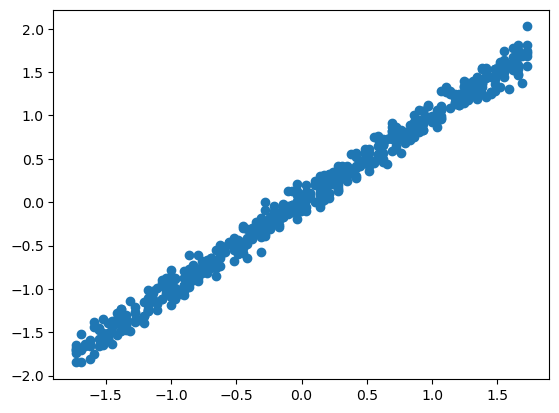

In [12]:
plt.scatter(X_train,y_train)
plt.show()

由于样本较小，这里采用批量梯度下降(BGD)

In [13]:
alpha = 0.01
iteration = 1000
sample = len(data)
w_b = np.random.rand(2,1)

In [14]:
wb_bgd = []
MSE_bgd = []

In [15]:
X_b = np.c_[np.ones((len(X_train), 1)), X_train]

In [16]:
for i in range(iteration):
    gradients = 2 / sample * X_b.T.dot(X_b.dot(w_b) - y_train)  
    w_b = w_b - alpha * gradients 
    MSE_loss = np.mean((X_b.dot(w_b) - y_train) ** 2)
    wb_bgd.append(w_b.copy())
    MSE_bgd.append(MSE_loss)

In [17]:
w = []
b = []
b = [w_b[0][0] for w_b in wb_bgd]
w = [w_b[1][0] for w_b in wb_bgd]

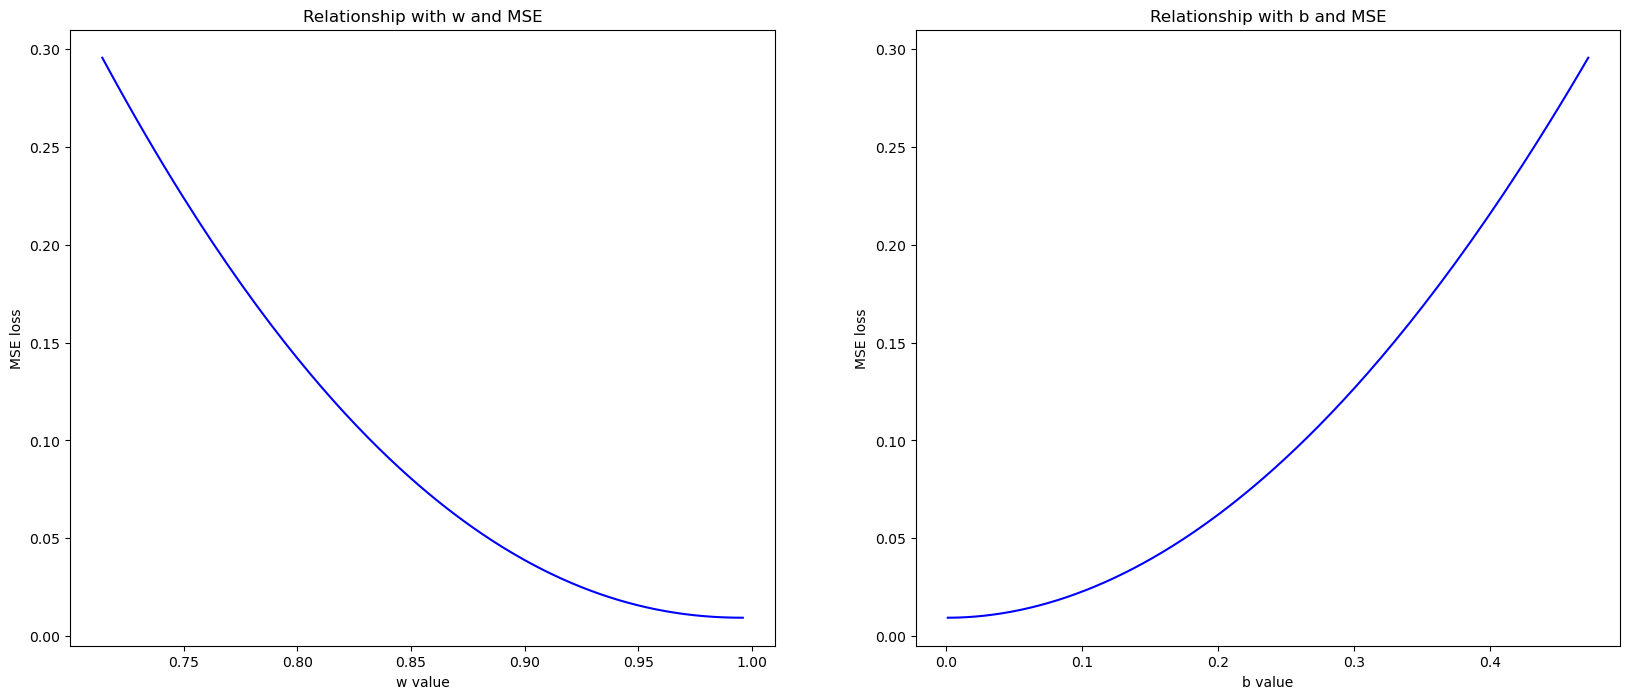

In [18]:
plt.figure(figsize = (20 , 8))

plt.subplot(1,2,1)
plt.title('Relationship with w and MSE')
plt.plot(w , MSE_bgd , 'b')
plt.xlabel('w value')
plt.ylabel('MSE loss')

plt.subplot(1,2,2)
plt.title('Relationship with b and MSE')
plt.plot(b , MSE_bgd , 'b')
plt.xlabel('b value')
plt.ylabel('MSE loss')
plt.show()

通过批量梯度下降发现w,b收敛

绘制wx+b的图像

In [19]:
best_w = w[-1]
best_b = b[-1]

In [20]:
def function(x):
    x_array = np.array(x)
    return best_w * x_array + best_b

训练集与拟合直线

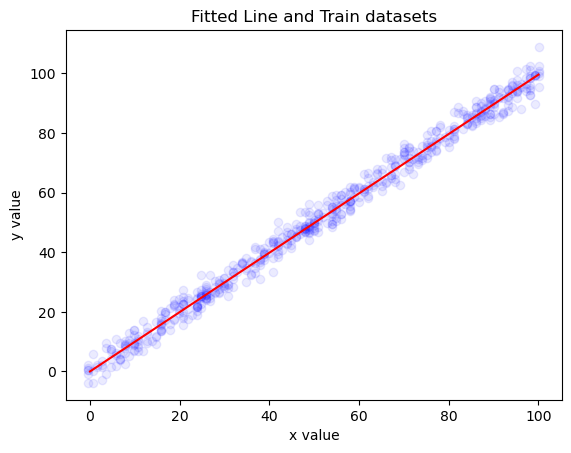

In [21]:
plt.scatter(scaler.inverse_transform(X_train),scaler.inverse_transform(y_train),color = 'b',alpha = 0.08)
plt.plot([0,20,40,60,100],function([0,20,40,60,100]),color = 'red')
plt.title('Fitted Line and Train datasets')
plt.xlabel('x value')
plt.ylabel('y value')
plt.show()

测试集效果

In [22]:
r2 = r2_score(y_test,function(X_test))

r2: 0.991


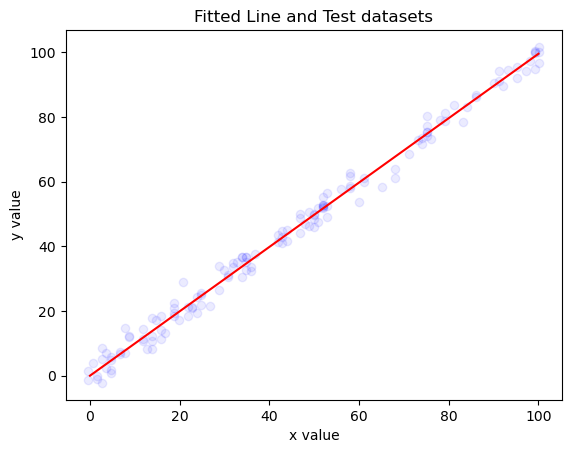

In [23]:
plt.scatter(scaler.inverse_transform(X_test),scaler.inverse_transform(y_test),color = 'b',alpha = 0.08)
plt.plot([0,20,40,60,100],function([0,20,40,60,100]),color = 'red')
plt.title('Fitted Line and Test datasets')
plt.xlabel('x value')
plt.ylabel('y value')
print('r2:',round(r2,3))
plt.show()